# Keras - Breast Cancer Classification 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

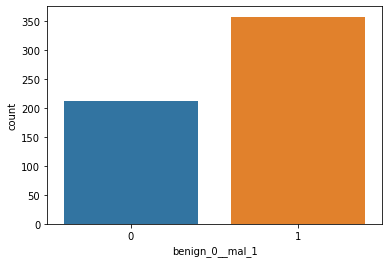

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

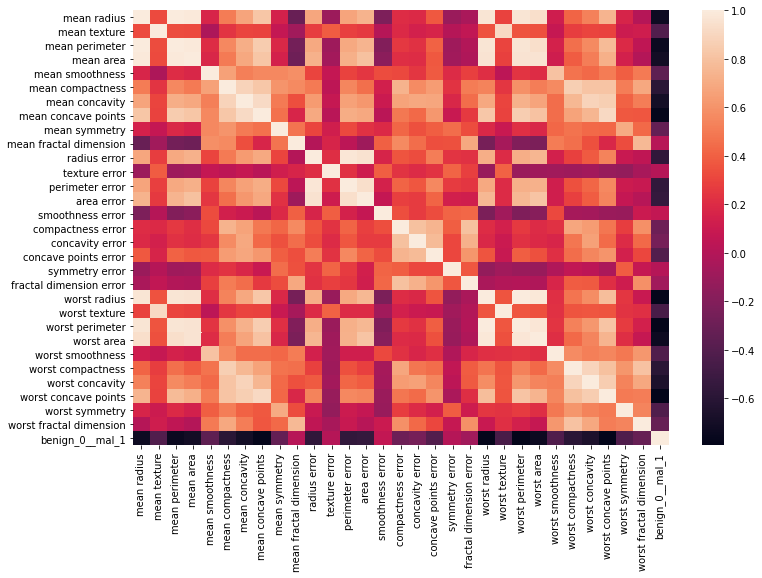

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr());

In [13]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

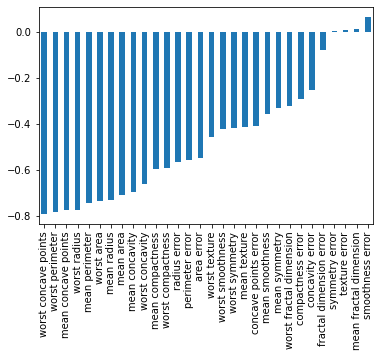

In [16]:
df.corr()['benign_0__mal_1'].drop('benign_0__mal_1').sort_values().plot(kind='bar');

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=101)

# Scaling Data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Creating the Model

    # For a binary classification problem use
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [28]:
X_train.shape

(426, 30)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-net

In [76]:

model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Training the Model

https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network


https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch


In [77]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test, y_test),
          verbose=0);

In [78]:
model_loss = pd.DataFrame(model.history.history)

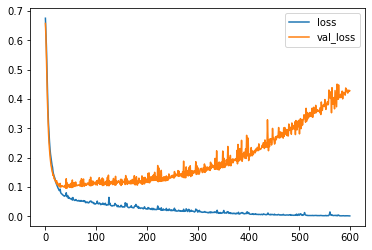

In [79]:
model_loss.plot()

# Add Early Stopping

In [80]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))

model.add(Dense(units=1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode = 'min',
                           patience = 25,
                           verbose = 1)

In [83]:
model.fit(x = X_train, 
          y = y_train, 
          epochs    = 600, 
          validation_data = (X_test, y_test), 
          callbacks = [early_stop],
          verbose   = 0)

Epoch 00066: early stopping


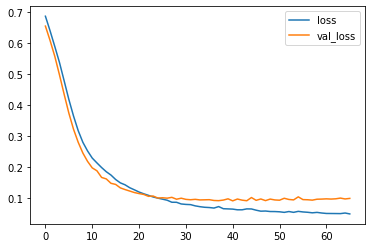

In [84]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Adding DroupOut Layers

In [99]:
from tensorflow.keras.layers import Dropout

In [100]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [101]:
model.fit(x = X_train, y = y_train, epochs=600,
          validation_data=(X_test, y_test), 
          verbose = 0,
          callbacks = [early_stop])

Epoch 00151: early stopping


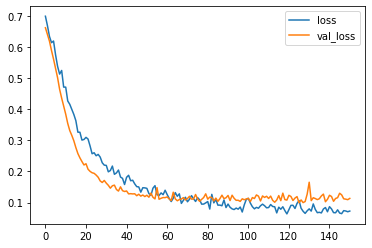

In [102]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [103]:
predictions = model.predict_classes(X_test)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [106]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]


# Tensorboard

In [147]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

In [148]:
datetime.now().strftime('%Y-%m-%d--%H%M')

'2020-10-03--1554'

In [164]:
pwd

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study'

In [167]:
log_directory = '/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study' + '/' + 'logs/fit'

In [168]:
log_directory

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study/logs/fit'

In [169]:
# Create Tensorboard Callback

# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
# timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
# log_directory = log_directory + '/' + timestamp

board = TensorBoard(log_dir = log_directory, 
                    histogram_freq = 1,
                    write_graph=True, 
                    write_images=True,
                    update_freq='epoch',
                    profile_batch=2,
                    embeddings_freq=1)

In [170]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [171]:
model.fit(x = X_train, y = y_train, epochs =600,
          validation_data= (X_test, y_test),
          callbacks = [early_stop, board],
          verbose = 0)

Epoch 00096: early stopping


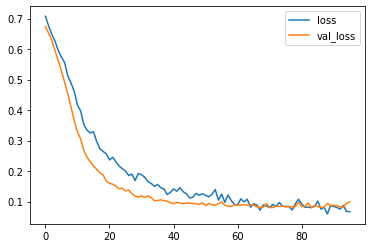

In [172]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [173]:
print(log_directory)

/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study/logs/fit


# Run this code in Terminal to view Tensorboard

Use cd at your command line to change directory to the file path reported back by pwd or your current .py file location.

Then run this code at your command line or terminal

tensorboard --logdir logs/fit